In [1]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [2]:
from keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 32, 32, 3)
Shape of y_train:  (50000, 1)
Shape of X_test:  (10000, 32, 32, 3)
Shape of y_test:  (10000, 1)


There are 50000 train and 10000 test RGB images of 32*32 dimension

In [112]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

Each category has 5000 image each in train set

In [113]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [6]:
classes = {0:	'airplane', 1: 'automobile', 2:	'bird', 3: 'cat', 4:	'deer', 5: 'dog', 6: 'frog',
           7:	'horse', 8: 'ship', 9: 'truck'}

In [7]:
classes[y_train[0].tolist()[0]],y_train[0].tolist(), classes.get(y_train[0].tolist()[0])

('frog', [6], 'frog')

Text(0.5, 0, 'frog')

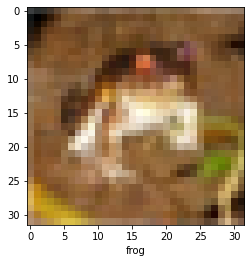

In [8]:
plt.imshow(X_train[0])
plt.xlabel(classes[y_train[0].tolist()[0]])

In [9]:
import numpy as np
np.unique(y_train), len(np.unique(y_train))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), 10)

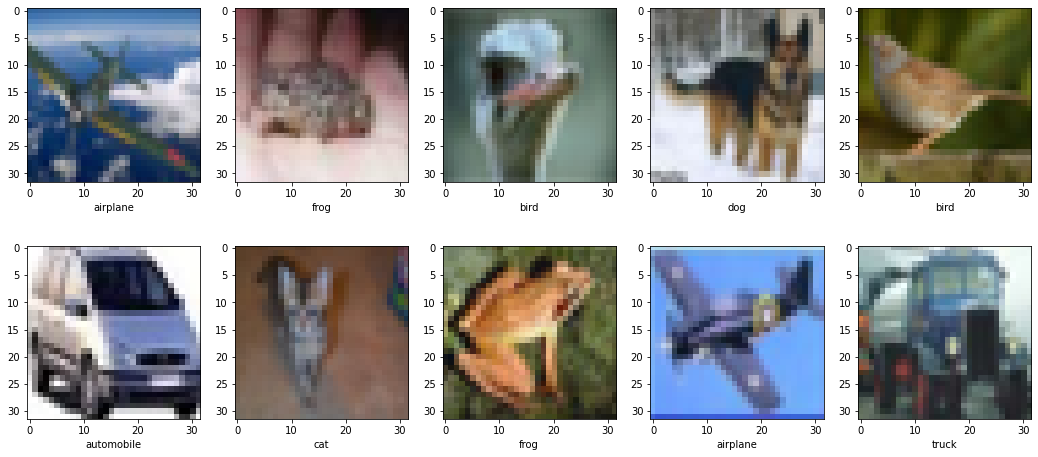

In [10]:
plt.figure(figsize=(18,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  random_num = np.random.randint(len(X_train))
  plt.imshow(X_train[random_num])
  plt.xlabel(classes[y_train[random_num].tolist()[0]])

plt.show()

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dropout, Dense
from tensorflow.keras.utils import plot_model

In [12]:
X_train_scaled = X_train/255.
X_test_scaled = X_test/255.

In [25]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))

model.add(Conv2D(128, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(156, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=250, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 156)       179868    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 156)        0         
 2D)                                                  

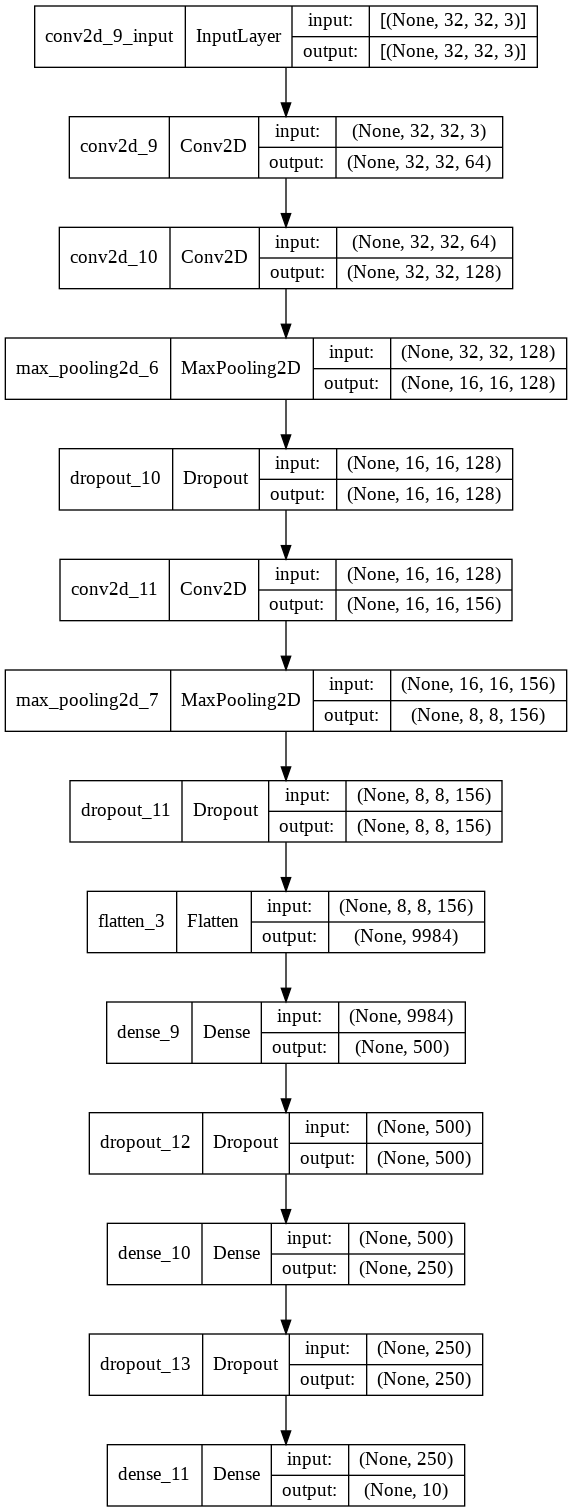

In [26]:
plot_model(model, show_shapes=True)

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
hist = model.fit(X_train_scaled, y_train, epochs=30, batch_size=1024, validation_data=(X_test_scaled, y_test))

Epoch 1/30
49/49 [==============================] - 13s 217ms/step - loss: 1.9677 - accuracy: 0.2708 - val_loss: 1.6214 - val_accuracy: 0.4209
Epoch 2/30
49/49 [==============================] - 9s 176ms/step - loss: 1.5076 - accuracy: 0.4471 - val_loss: 1.3139 - val_accuracy: 0.5187
Epoch 3/30
49/49 [==============================] - 9s 177ms/step - loss: 1.2837 - accuracy: 0.5377 - val_loss: 1.1359 - val_accuracy: 0.6050
Epoch 4/30
49/49 [==============================] - 9s 177ms/step - loss: 1.1174 - accuracy: 0.6005 - val_loss: 1.0662 - val_accuracy: 0.6161
Epoch 5/30
49/49 [==============================] - 9s 178ms/step - loss: 0.9873 - accuracy: 0.6488 - val_loss: 0.9036 - val_accuracy: 0.6810
Epoch 6/30
49/49 [==============================] - 9s 178ms/step - loss: 0.8901 - accuracy: 0.6897 - val_loss: 0.8253 - val_accuracy: 0.7136
Epoch 7/30
49/49 [==============================] - 9s 179ms/step - loss: 0.8012 - accuracy: 0.7194 - val_loss: 0.7698 - val_accuracy: 0.7334
Epoch

In [34]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

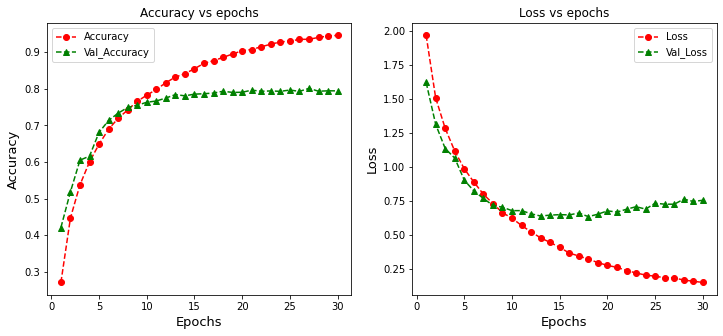

In [36]:
acc = hist.history['accuracy']
loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
epochs = range(1,len(acc)+1)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'ro--', label='Accuracy')
plt.plot(epochs, val_acc, 'g^--', label='Val_Accuracy')
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Accuracy", fontsize=13)
plt.title("Accuracy vs epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'ro--', label='Loss')
plt.plot(epochs, val_loss, 'g^--', label='Val_Loss')
plt.xlabel("Epochs", fontsize=13)
plt.ylabel("Loss", fontsize=13)
plt.title("Loss vs epochs")
plt.legend()

plt.show()

In [66]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7563 - accuracy: 0.7944


[0.7563080787658691, 0.7943999767303467]

In [43]:
y_pred = model.predict(X_test)

In [48]:
y_pred[0].tolist()

[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [74]:
def encodetolabel(pred):
  for i, num in enumerate(pred.tolist()):
    if(num>0.0):
      id = i
  return classes[id]

encodetolabel(y_pred[0])

'cat'

In [58]:
classes[y_test[0].tolist()[0]]

'cat'

In [ ]:
def predtolabel(pred):
  return 

In [60]:
def trueLabel(arr):
  label = classes[arr.tolist()[0]]
  return label

trueLabel(y_test[0])

'cat'

In [61]:
from keras.models import save_model
save_model(model, filepath="model_cifar10.h5")

In [62]:
from keras.saving.save import load_model
model1 = load_model('model_cifar10.h5')

In [65]:
model1.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7563 - accuracy: 0.7944


[0.7563080787658691, 0.7943999767303467]

In [75]:
y_pred = model1.predict(X_test_scaled)

In [83]:
y_test[0:9]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3]], dtype=uint8)

In [85]:
[np.argmax(i) for i in y_pred[0:9]]

[5, 8, 8, 0, 6, 6, 1, 6, 3]

In [89]:
np.argmax(y_pred[0])

5

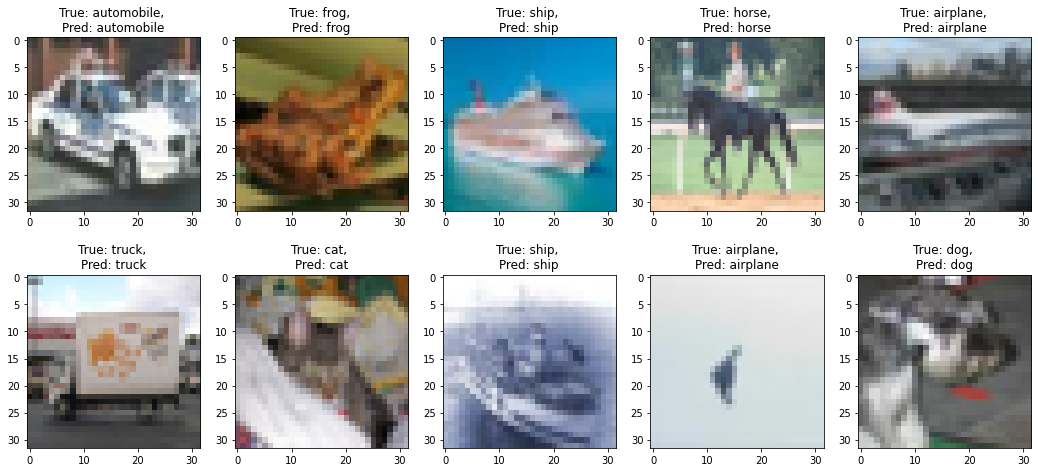

In [91]:
plt.figure(figsize=(18,8))
for i in range(10):
  num = np.random.randint(len(X_test))
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[num])
  plt.title("True: {}, \nPred: {}".format(trueLabel(y_test[num]), classes[np.argmax(y_pred[num])])  )

In [96]:
y_predicted = [np.argmax(i) for i in y_pred]
#y_test, y_predicted

In [98]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[847,  10,  28,  15,  11,   5,   7,   8,  37,  32],
       [  8, 905,   1,   6,   1,   3,   4,   1,  13,  58],
       [ 52,   7, 662,  58,  60,  63,  54,  25,  11,   8],
       [ 18,   8,  44, 616,  52, 174,  45,  25,   7,  11],
       [ 13,   4,  39,  49, 767,  36,  30,  53,   6,   3],
       [  8,   6,  21, 129,  30, 751,  10,  35,   3,   7],
       [  5,   5,  35,  56,  38,  27, 822,   5,   3,   4],
       [  8,   2,  16,  20,  36,  50,   2, 857,   1,   8],
       [ 55,  34,  11,  12,   5,   3,   3,   7, 844,  26],
       [ 19,  63,   5,   9,   3,   6,   2,  10,  10, 873]])

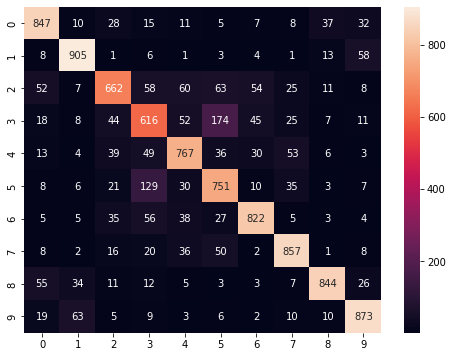

In [106]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',)
plt.show()

In [107]:
print(classification_report(y_test, y_predicted) )

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.87      0.91      0.89      1000
           2       0.77      0.66      0.71      1000
           3       0.64      0.62      0.63      1000
           4       0.76      0.77      0.77      1000
           5       0.67      0.75      0.71      1000
           6       0.84      0.82      0.83      1000
           7       0.84      0.86      0.85      1000
           8       0.90      0.84      0.87      1000
           9       0.85      0.87      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000

